# Light Curve Analysis
Kristopher Mortensen

### Objective:

1. Using the data for redshift = 0.015 (z = 0.015), I would like for you to plot the light curve in the "i" band. 

2. Once you accomplish that, I would like for you to plot the light curve of the same source in apparent magnitude. Hint - you'll need to convert from redshift to distance and then convert from distance to distance modulus.

To accomplish this goal, I will be using data from the NS-NS compact binary APR4-1215. That bands with which the light curves will be calculated are the u, g, r, i, and z bands.

In [41]:
#in order to product the proper plots and calculations, I will need matplotlib, numpy, pandas, and astropy.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy as astro
plt.rcParams["figure.figsize"] = (10,8)

In [29]:
#retrieve the data of the absolute magnitudes of APR4-1215
data = pd.read_csv("/Users/kristophermortensen/Desktop/CIERA REU 2017/APR4-1215.csv")
data

,day,u,g,r,i,z,J,H,K
0,1.06,-8.76,-10.54,-12.29,-13.91,-14.75,-14.08,-12.78,-11.85
1,1.19,-8.35,-10.36,-12.23,-13.86,-14.77,-14.08,-12.61,-11.67
2,1.33,-7.98,-10.15,-12.14,-13.81,-14.77,-14.09,-12.37,-11.14
3,1.50,-7.46,-9.95,-12.04,-13.74,-14.75,-14.12,-12.28,-10.68
4,1.68,-7.03,-9.66,-11.88,-13.65,-14.71,-14.17,-12.47,-10.55
5,1.88,-6.5,-9.34,-11.71,-13.53,-14.65,-14.20,-12.71,-10.87
6,2.11,-5.71,-9.05,-11.55,-13.41,-14.57,-14.24,-12.98,-11.27
7,2.37,-5.16,-8.60,-11.30,-13.26,-14.45,-14.26,-13.20,-11.66
8,2.66,-4.54,-8.06,-11.02,-13.08,-14.30,-14.30,-13.43,-12.16
9,2.99,-3.19,-7.66,-10.75,-12.89,-14.14,-14.35,-13.57,-12.57


In [30]:
#store the data for the day and magnitude measurements as 'day' and 'i_band' repectively.
day = data.day
day_u=day[0:14]
u_band=pd.to_numeric(data.u[0:14])
g_band=data.g
r_band=data.r
i_band=data.i
z_band=data.z
redshift=0.015

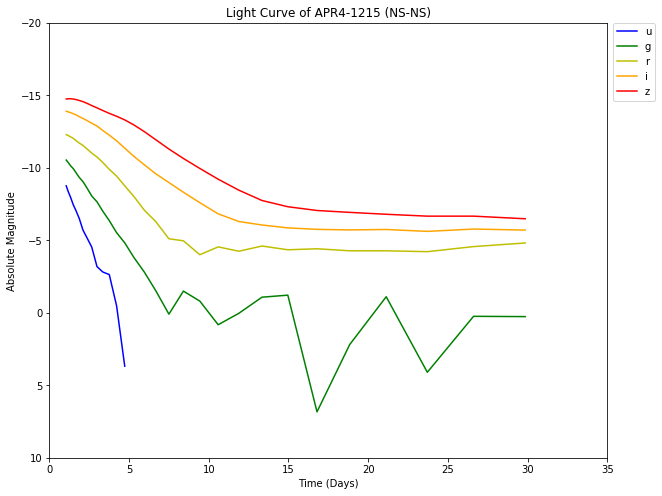

In [42]:
#plot the absolute magnitudes of APR4-1215 as a function of time (measured in days).
plt.plot(day_u, u_band, 'b', label='u')
plt.plot(day, g_band, 'g', label='g')
plt.plot(day, r_band, 'y', label='r')
plt.plot(day, i_band, 'orange', label='i')
plt.plot(day, z_band, 'r', label='z')
plt.axis([0,35,10,-20])
plt.title("Light Curve of APR4-1215 (NS-NS)")
plt.xlabel("Time (Days)")
plt.ylabel("Absolute Magnitude")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

In [5]:
from astropy.cosmology import WMAP9 as cosmo
#app_mag: ListofNumbers -> ListofNumbers
#converts all the absolute magnitudes into apparent magnitudes.
def app_mag(data, redshift):
    return 5*np.log10(lumo_dist(redshift)/10)+data

#lumo_dist: Number -> Number
#converts redshift to luminosity distance
def lumo_dist(redshift):
    return cosmo.luminosity_distance(redshift).to(astro.units.pc).value

In [6]:
#convert all the absolute magnitudes into apparent magnitudes in the i band, and store it as i_new.
u_new=app_mag(u_band, redshift)
r_new=app_mag(r_band, redshift)
g_new=app_mag(g_band, redshift)
i_new=app_mag(i_band, redshift)
z_new=app_mag(z_band, redshift)


In [7]:
#These are the typical 5-sigma depths that LSST can see in each of the photometric bands.
LSST_u=(day/day)-1+23.9
LSST_g=(day/day)-1+25.0
LSST_r=(day/day)-1+24.7
LSST_i=(day/day)-1+24.0
LSST_z=(day/day)-1+23.3

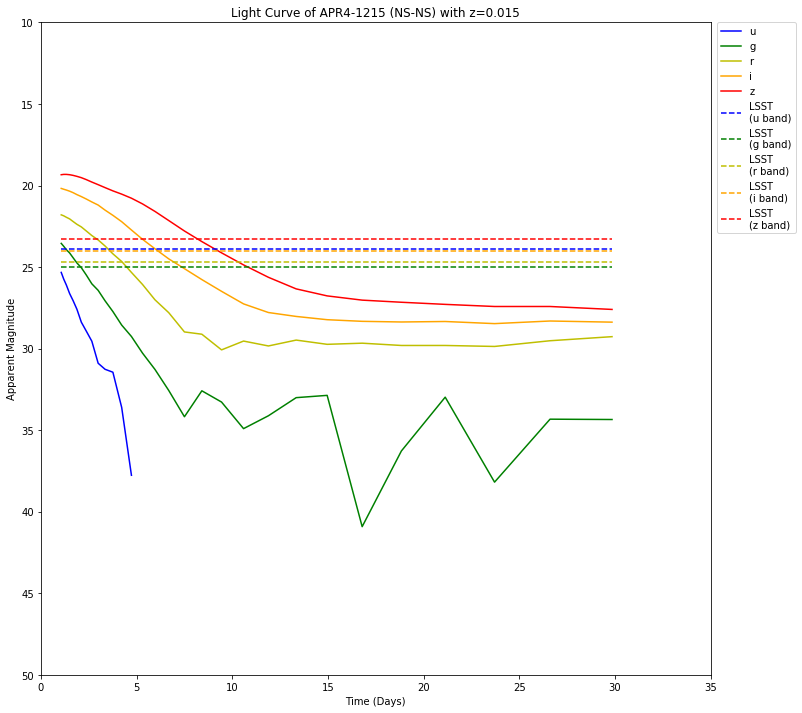

In [44]:
#plot the apparent magnitudes as a function of time (measured in days).
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
ax.plot(day_u, u_new, 'b', label='u')
ax.plot(day, g_new, 'g', label='g')
ax.plot(day, r_new, 'y', label='r')
ax.plot(day, i_new, 'orange', label='i')
ax.plot(day, z_new, 'r', label='z')
ax.plot(day, LSST_u, 'b--', label='LSST \n(u band)')
ax.plot(day, LSST_g, 'g--', label='LSST \n(g band)')
ax.plot(day, LSST_r, 'y--', label='LSST \n(r band)')
ax.plot(day, LSST_i, '--', color='orange', label='LSST \n(i band)')
ax.plot(day, LSST_z, 'r--', label='LSST \n(z band)')

plt.axis([0,35,50,10])
plt.title("Light Curve of APR4-1215 (NS-NS) with z=0.015")
plt.xlabel("Time (Days)")
plt.ylabel("Apparent Magnitude")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
fig.savefig('samplefigure', bbox_inches='tight')

#### Conclusion

Looking at the apparent light curves of the five bands, it is clear that the near IR bands, LSST can detect the kilonova light curves for longer periods of time than the shorter wavelength bands. Even though the data comes from similations, this is key for LSST considering the time frame of these compact binaries. If LSST receives word that LIGO observed a source in a large map of the sky, the telescope will want to have as must time looking for this transient light before it is too far out of its reach. Therefore, according to this model, having the telescope look more in the near IR spectrum allows more time for the telescope to detect the NS-NS merger.